In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Mounted at /content/drive
 CNN.ipynb				     'LSTM with SA.ipynb'
 CNN_With_SA.ipynb			      Models
'Consulting proposal.gslides'		     'Old Notebooks'
'Data Preprocessing.ipynb'		     'Project Wireframes.gslides'
 Datasets				     'Prototyping presentation.gslides'
'Individual Program Brief Template.gslides'  'Spam filter 2.zip'
 LSTM.ipynb				     'Spam Filter.zip'


In [ ]:
import pickle
import keras
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate

In [ ]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

pickle_off_polarity_tr = open(dataset_dir + "/train_polarity.pickle","rb")
polarity_tr = pickle.load(pickle_off_polarity_tr)

pickle_off_polarity_test = open(dataset_dir + "/test_polarity.pickle","rb")
polarity_test = pickle.load(pickle_off_polarity_test)

In [ ]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    [train_padded, polarity_tr], train_labels, batch_size=32, epochs=epochs_num, validation_data=([test_padded, polarity_test], test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [ ]:
inputA = Input(shape=(train_padded.shape[1],))
inputB = Input(shape=(1,))

x = Embedding(564273, 128)(inputA)
x = Conv1D(8, 10, padding = 'valid' , activation = 'relu', strides = 1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalMaxPooling1D()(x)
x = Model(inputs=inputA, outputs=x)

combined = concatenate([x.output, inputB])

z = Dense(64, activation="relu")(combined)
z = Dropout(0.7)(z)
z = Dense(1, activation="sigmoid")(z)
model = Model(inputs=[x.input, inputB], outputs=z)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 128)     72226944    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 91, 8)        10248       ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 45, 8)        0           ['conv1d[0][0]']                 
                                                                                            

In [ ]:
model.compile(loss='categorical_hinge',
              optimizer='Adamax',
              metrics=['accuracy'])

Epoch 1/50
149/149 [==============================] - 1s 6ms/step - loss: 1.0369 - accuracy: 0.5497 - val_loss: 0.9411 - val_accuracy: 0.7479
Epoch 2/50
149/149 [==============================] - 1s 5ms/step - loss: 0.9867 - accuracy: 0.7714 - val_loss: 0.8417 - val_accuracy: 0.9056
Epoch 3/50
149/149 [==============================] - 1s 5ms/step - loss: 0.7974 - accuracy: 0.9112 - val_loss: 0.6173 - val_accuracy: 0.9351
Epoch 4/50
149/149 [==============================] - 1s 6ms/step - loss: 0.6570 - accuracy: 0.9492 - val_loss: 0.5514 - val_accuracy: 0.9410
Epoch 5/50
149/149 [==============================] - 1s 5ms/step - loss: 0.6080 - accuracy: 0.9652 - val_loss: 0.5281 - val_accuracy: 0.9460
Epoch 6/50
149/149 [==============================] - 1s 5ms/step - loss: 0.5887 - accuracy: 0.9757 - val_loss: 0.5177 - val_accuracy: 0.9486
Epoch 7/50
149/149 [==============================] - 1s 5ms/step - loss: 0.5771 - accuracy: 0.9800 - val_loss: 0.5138 - val_accuracy: 0.9536
Epoch 

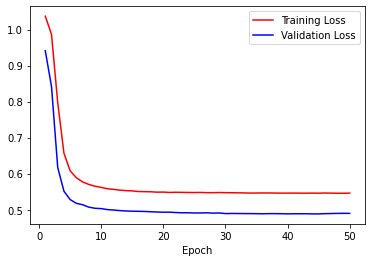

In [ ]:
train_and_vizualize_model(model, 50)

In [ ]:
score = model.evaluate([test_padded, polarity_test], test_labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.48976385593414307
Test accuracy: 0.9629005193710327


In [ ]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_cnn_sa = open(models_dir + "/CNN_SA.pickle","wb")
pickle.dump(model, pickle_cnn_sa)
pickle_cnn_sa.close()

INFO:tensorflow:Assets written to: ram://8f90e305-1f4e-4082-bc14-4ad3b2cf9767/assets
